In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/niteshjindal170988/unsupervised-learning/blob/main/clustering/principal_component_analysis_digit_recognizer.ipynb)

# Imports

In [8]:
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import pandas as pd
import numpy 
import random
import time
import math
from copy import deepcopy
import warnings
from scipy.stats import multivariate_normal
from sklearn.datasets.samples_generator import make_blobs
import os
warnings.filterwarnings("ignore")
os.getcwd()


'C:\\Users\\AG89382\\AppData\\Local\\Programs\\Python\\Python37\\deepenv\\tutorials\\unsupervised-learning\\clustering'

# Load Digit-Recognizer Data from Google Drive Path

In [7]:
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org google-api-python-client==2.22.0
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org google-auth google-auth-oauthlib google-auth-httplib2
!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org gdown==4.2.0
import gdown
warnings.filterwarnings("ignore")

# Load digit-recognizer (Train Data)
url = 'https://drive.google.com/uc?id=1SfSO5ZloHH3W6GJa5rfy9-qwjG4YPbM4'
output = 'train.csv'
gdown.download(url, output, quiet=False, verify=False)

You should consider upgrading via the 'c:\users\ag89382\appdata\local\programs\python\python37\deepenv\scripts\python.exe -m pip install --upgrade pip' command.
Downloading...
From: https://drive.google.com/uc?id=1SfSO5ZloHH3W6GJa5rfy9-qwjG4YPbM4
To: C:\Users\AG89382\AppData\Local\Programs\Python\Python37\deepenv\tutorials\unsupervised-learning\clustering\train.csv
100%|██████████████████████████████████████████████████████████████████████████████| 76.8M/76.8M [01:59<00:00, 643kB/s]


'train.csv'

# Read the Digits Data

In [10]:
data = pd.read_csv("train.csv")
data.head() #  Digits / Pixel data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Scatter Plot between Top-2 Projections of Digit-Recognizer Data

There are total of 10 labels (0 to 9). We use a `for` loop to iterate on each labelled subset digits data.


Scatter Plot between Projected Component 1 and Projected Component 2 for label0:


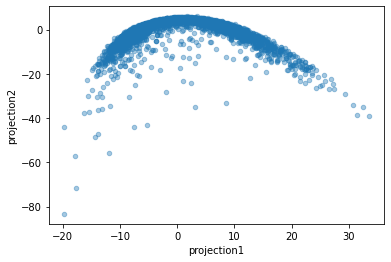


Scatter Plot between Projected Component 1 and Projected Component 2 for label1:


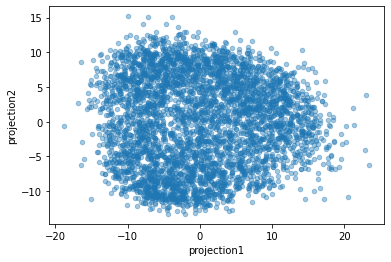


Scatter Plot between Projected Component 1 and Projected Component 2 for label2:


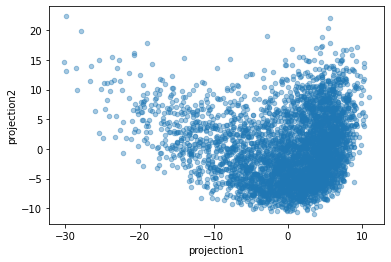


Scatter Plot between Projected Component 1 and Projected Component 2 for label3:


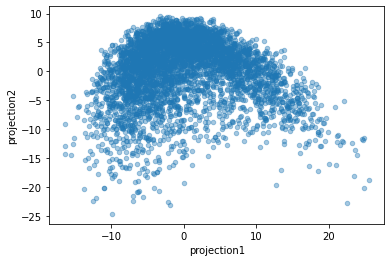


Scatter Plot between Projected Component 1 and Projected Component 2 for label4:


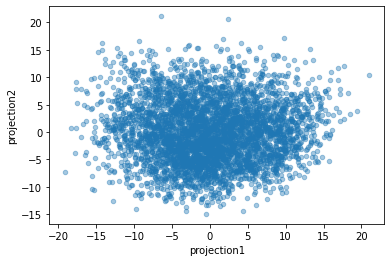


Scatter Plot between Projected Component 1 and Projected Component 2 for label5:


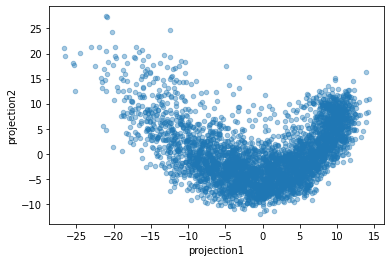


Scatter Plot between Projected Component 1 and Projected Component 2 for label6:


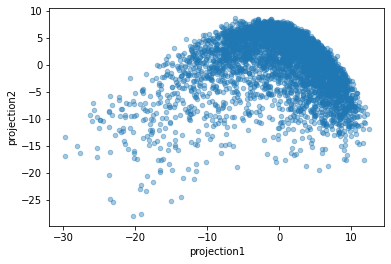


Scatter Plot between Projected Component 1 and Projected Component 2 for label7:


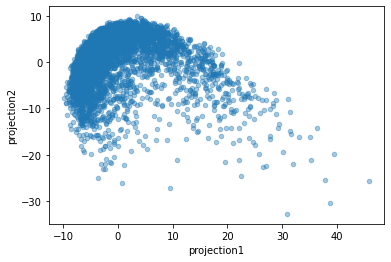


Scatter Plot between Projected Component 1 and Projected Component 2 for label8:


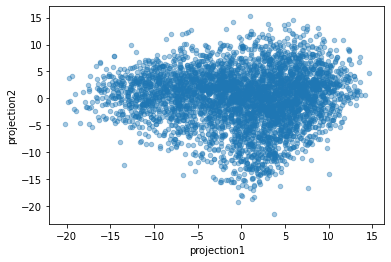


Scatter Plot between Projected Component 1 and Projected Component 2 for label9:


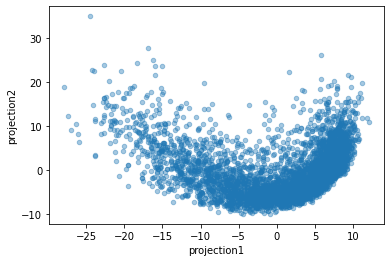

In [16]:
for i in range(0, len(data['label'].unique())):
    data['label'].unique()
    
    '''create subset for each class label'''
    subsetdata =  data[data['label'] == data['label'].unique()[i]]  
    label = subsetdata['label']
    subsetvar = subsetdata.drop(["label"], axis =1) # drop the label column since we will apply PCA 
    
    '''apply standard scaler to scale the data with mean 0 and unit variance'''
    scaled = StandardScaler(copy=True, with_mean=True).fit_transform(subsetvar)  # shape is (4684, 784)
    
    '''Compute eigenvalues,eigen vectors from covariance matrix of the scaled data'''
    covmat = numpy.cov(scaled, rowvar = False, bias = False )
    eigenva, eigenve = numpy.linalg.eig(covmat) # input to linalg.eig() from numpy module is square array which is covariance matrix in our case
    pairs_eigva_eigve = [(numpy.abs(eigenva[k]), eigenve[:,k]) for k in range(len(eigenva))] 
    
    '''Sort eigen values in descending order in list '''
    sorting_eig_pairs =sorted(pairs_eigva_eigve, key=lambda eigva: eigva[0], reverse=True)  
    
    '''Stack horizontally top two eigen value vector which captures maximum variance in data'''
    stackedcomp = numpy.hstack((sorting_eig_pairs[0][1].reshape(784,1), sorting_eig_pairs[1][1].reshape(784,1))) 
    
    '''Dot product the scaled data with two projections to get close to original data'''
    projecteddata = scaled.dot(stackedcomp)
    projecteddataframe = pd.DataFrame({'projection1': projecteddata[:,0], 'projection2':projecteddata[:,1]})
    
    '''Scatter plot between top two projected components for each class label'''
    print("\nScatter Plot between Projected Component 1 and Projected Component 2 for label" + str(i) + ":", )
    projecteddataframe.plot(kind="scatter", x= "projection1", y= "projection2", alpha=0.4)
    plt.show()

 